# Week 5: Plotting with `matplotlib` & introduction to numerical integration

This week, we introduce the `matplotlib` library and its `pyplot` submodule to create line and scatter plots in Python. We also take the first steps towards numerical methods used to estimate definite integrals numerically.

The best way to learn programming is to write code. Don't hesitate to edit the code in the example cells, or add your own code, to test your understanding. You will find practice exercises throughout the notebook, denoted by 🚩 ***Exercise $x$:***.

#### Displaying solutions

Solutions will be released one week after the worksheets are released, as a new `.txt` file in the same GitHub repository. After pulling the file to your workspace (either your computer or your Noteable server), run the following cell to create clickable buttons under each exercise, which will allow you to reveal the solutions.

In [1]:
%run scripts/create_widgets.py week05

<IPython.core.display.Javascript object>

Buttons created!


---
### 📚 Book sections

- **ASC**: sections **3.3**, 4.8.2, 6.1, 6.6
- **PCP**: sections 1.6.1, 6 (introduction), 6.1

🚩 Section **3.3** of **ASC** is highly recommended reading alongside the numerical integration section of this notebook.

---
## 1. Plotting with `matplotlib.pyplot`

### 1.1. A first plot

The `matplotlib` library and its `pyplot` interface contain a very large number of built-in functions for plotting data.

We import the plotting tools with

```python
%matplotlib notebook
import matplotlib.pyplot as plt
```

where the first command is a notebook-wide setting, which allows to generate **dynamic plots** inside the Jupyter notebook, which we can e.g. zoom into or further modify. (We can toggle back to the default behaviour using the command `%matplotlib inline`, where all plots are "printed" for good when they are created, and cannot be further modified.)

A basic line plot is generated using the `plt.plot()` function. For example, to plot $x \sin \left( x \right)$ for $x \in \left[ 0, 2 \pi \right]$:
* first, create a reasonably large number of values of $x$ at which to plot the function, for example using `np.linspace()` from the Numpy module;
* then, evaluate the function at these values;
* finally, **create** a line plot with `plt.plot()`, and **display it** with `plt.show()`.

<IPython.core.display.Javascript object>


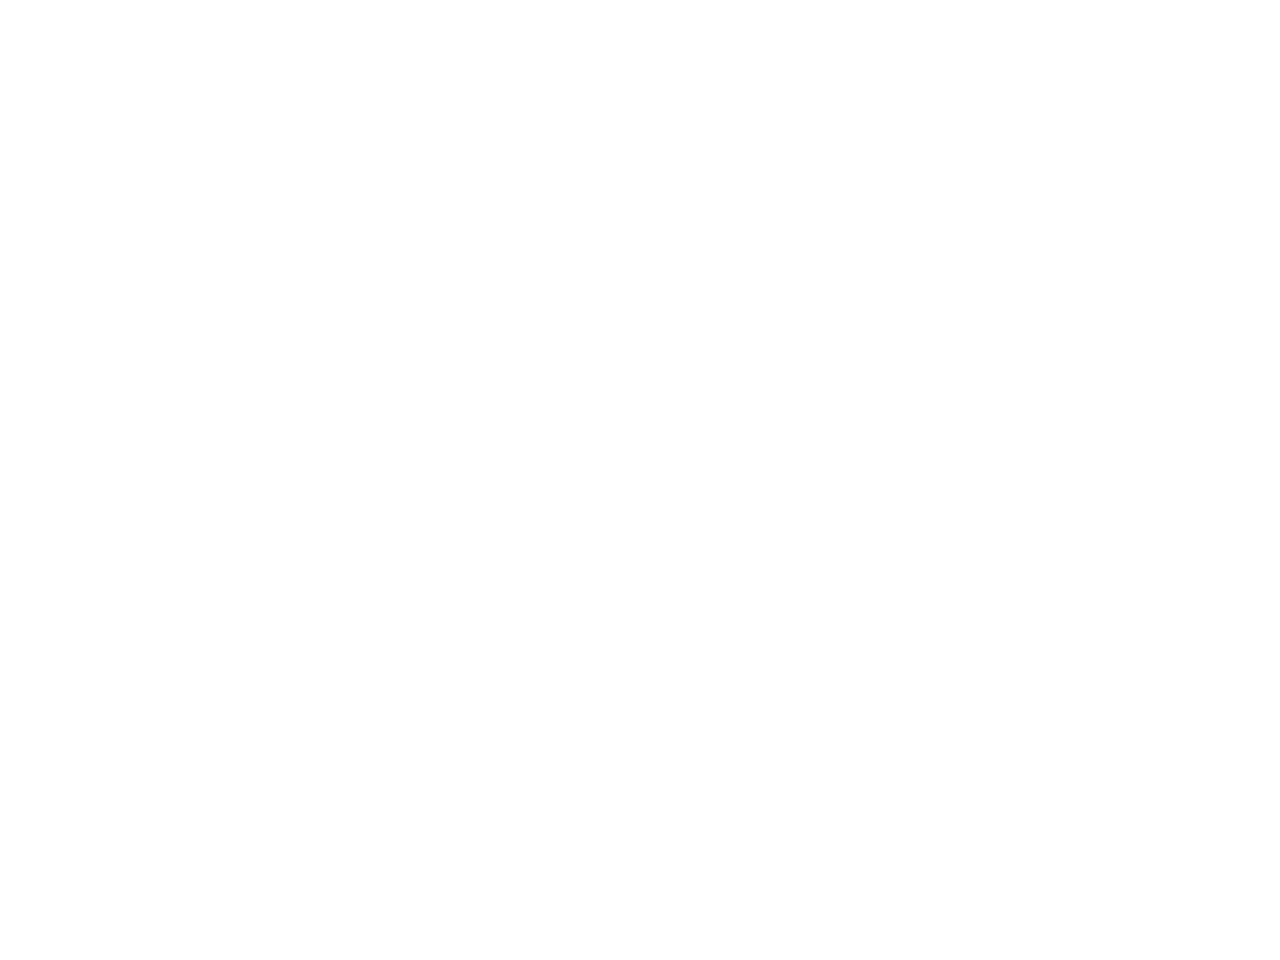

In [2]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

# Create an x-axis with 1000 points
x = np.linspace(0., 2*np.pi, 50)

# Evaluate the function at all these points
y = x * np.sin(x)

# Create the plot and display it
plt.plot(x, y, 'k-')
plt.show()

The final argument of `plt.plot()` defines the line colour and line type: here `'k'` indicates black, and `'-'` indicates a solid line.

The `plt.plot()` function can be used to generate scatter plots by replacing the character indicating the line style (for example `-` for a solid line) with a symbol to indicate a marker style. For example

```python
plt.plot(x, y, 'kx')
```

plots a scatter plot with black crosses. Here the `x` character in the final argument indicates the marker type.
    
---
**📚 Learn more:**
* [Matplotlib: Python plotting](https://matplotlib.org/contents.html) - Matplotlib documentation
* [Matplotlib gallery](https://matplotlib.org/gallery/index.html)
* [Pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) - Matplotlib documentation
* [Matplotlib line style reference](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html)
* [Matplotlib: Specifying Colors](https://matplotlib.org/users/colors.html) - Matplotlib documentation
* [Matplotlib: markers](https://matplotlib.org/api/markers_api.html) - Matplotlib documentation
* [numpy.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) - Numpy documentation
* [Chapter 4: Visualization with Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/#4.-Visualization-with-Matplotlib) - J. VanderPlas, *The Python Data Science Handbook*

---

When plotting functions you should ensure that you evaluate the function at a sufficient number of points (typically at least $100$). `plt.plot(x, y)` draws one point per element in `x` and `y` (coordinates (`x[0], y[0]`), (`x[1], y[1]`), etc.), and joins these points with straight lines; a line plot therefore only looks smooth if the grid of points is dense enough. Try replacing `1000` with `10` in the code cell above to see this.

---
🚩 ***Exercise 1:*** Click on the 'Stop interaction' blue button in the plot above (we will see why later). Then, plot the following functions on the interval $x \in \left[ -\pi, \pi \right]$. Try different line colours and types. Don't forget to `import matplotlib.pyplot`, or to run the previous example cell to import it.
* a) $f_1(x) = \sin \left( x \right)$,  
* b) $f_2(x) = \tan \left( \frac{49}{100} x \right)$,  
* c) $f_3(x) = \sin \left( x \right) \cos \left( 2 x \right)$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plotting(f):
    x = np.linspace(-np.pi, np.pi, 1000)
    y = f(x)
    
    plt.plot(x, y, 'b-')
    plt.show()

    
def f1(x):
    return np.sin(x)

def f2(x):
    return np.tan(49 * x/100)

def f3(x):
    return np.sin(x) * np.cos(2 * x)

plotting(f1)
plotting(f2)
plotting(f3)

In [4]:
%run scripts/show_solutions.py week05_ex1

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---
### 1.2. Figures and axes as objects

By default, if no plot exists, `plt.plot()` creates a *figure* window, and adds a set of *axes* to the figure. If a set of axes has already been created, when running `plt.plot()` a second time, the same axes are re-used, and the second plot is drawn over the first one. (If you didn't click the 'Stop interaction' button earlier, your plots in the first exercise will have appeared on top of the first example plot!)

Like everything in Python, figures and axes are **objects**. The `plt.subplots()` function can used to create a new figure object, along with one or more set(s) of axes inside it. The statement

```python
fig, ax = plt.subplots(m, n)
```

creates a figure object, which we assign to the variable `fig`, and an array of axes, assigned to the variable `ax`, tiled in `m` rows and `n` columns. Try it:

<IPython.core.display.Javascript object>


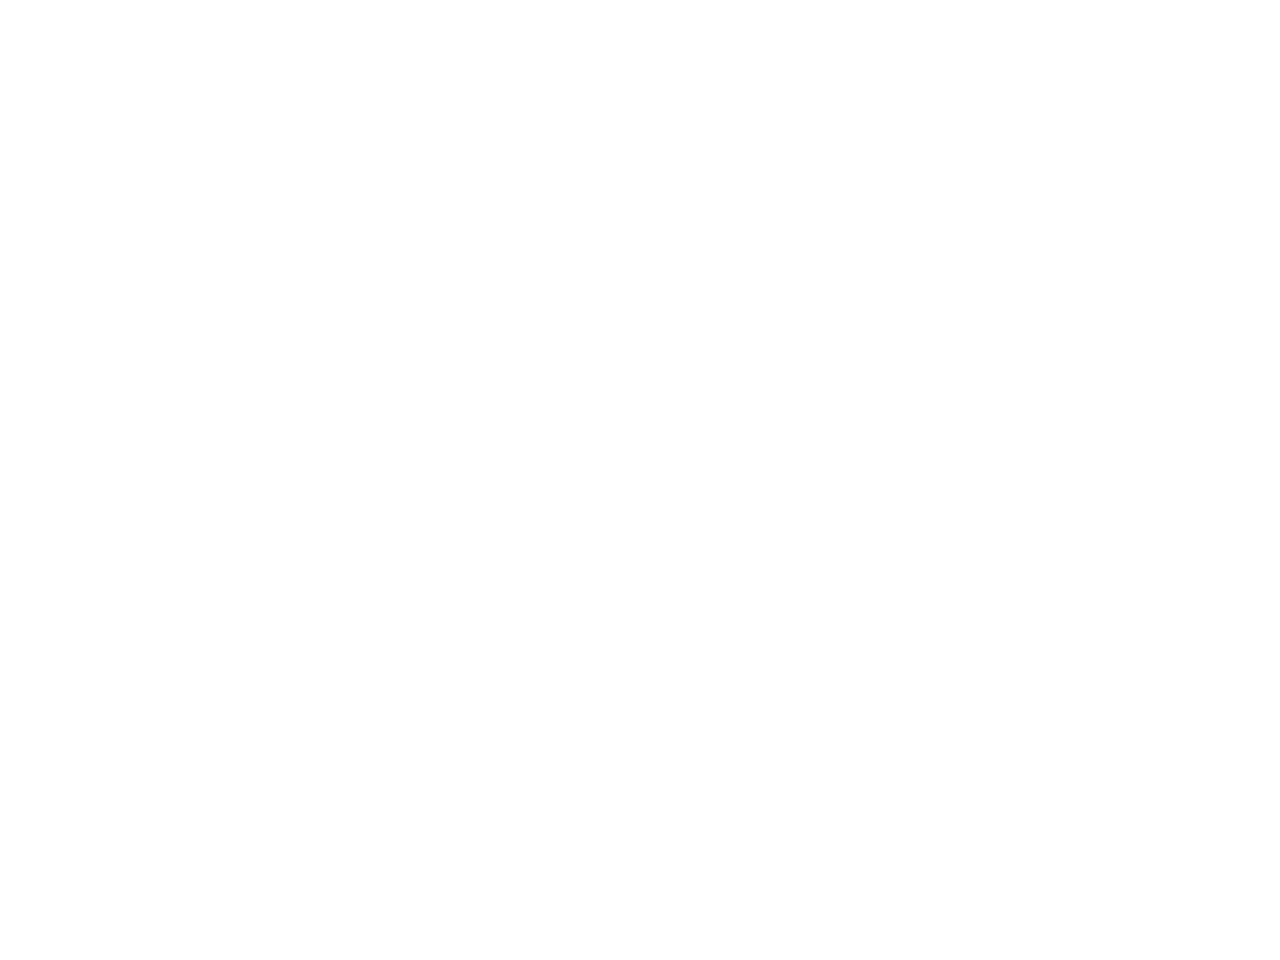

<IPython.core.display.Javascript object>


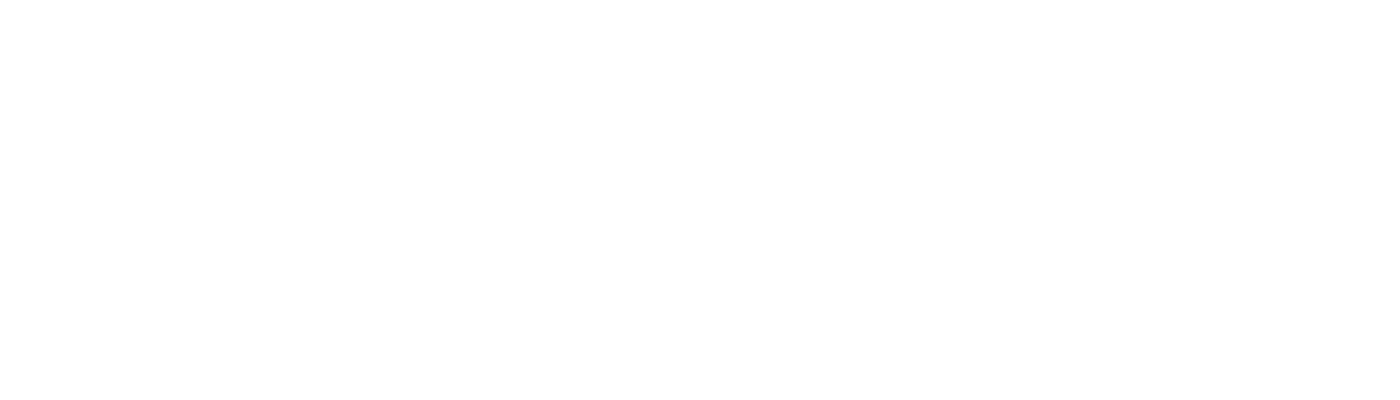

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define x
x = np.linspace(0, 2*np.pi, 1000)

# Create figure and axes
fig_1, ax_1 = plt.subplots(2, 3)

# We can also create a second figure, with the optional
# "figsize" argument of plt.subplots()
fig_2, ax_2 = plt.subplots(1, 4, figsize=(7, 2))

plt.show()

Now, we can select individual axes in the array, and use `.plot()` as before (this time, as a **method** of the `Axes` object):

In [6]:
# Plot on 1st row, 2nd column of the first figure
ax_1[0, 1].plot(x, np.sin(x), 'm-')

# Plot on 2nd row, 3rd column
ax_1[1, 2].plot(x, np.cos(x), 'c-')

# Plot on 4th plot of the second figure
ax_2[3].plot(x, np.sinc(x), 'g-.')

# Update the display
plt.show()

Remember to scroll up to see these changes on the first figure (as we plotted on `ax_1`). Try changing the axes onto which these appear (for instance, try the second set of axes in the second figure).

Note that, when using `plt.subplots(m, n)` with `m` or `n` equal to `1` (that is, when creating a **single** row or column of plots), as is the case for `ax_2`, you only need **one index** to access a given subplot.

---
**📚 Learn more:**
* [Matplotlib Usage Guide: Parts of a figure](https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure) -- **highly recommended read!**

---

🚩 ***Exercise 2:*** Use the `plt.subplots` function to plot the three functions in the previous exercise in one figure, with a different subplot for each.

<IPython.core.display.Javascript object>


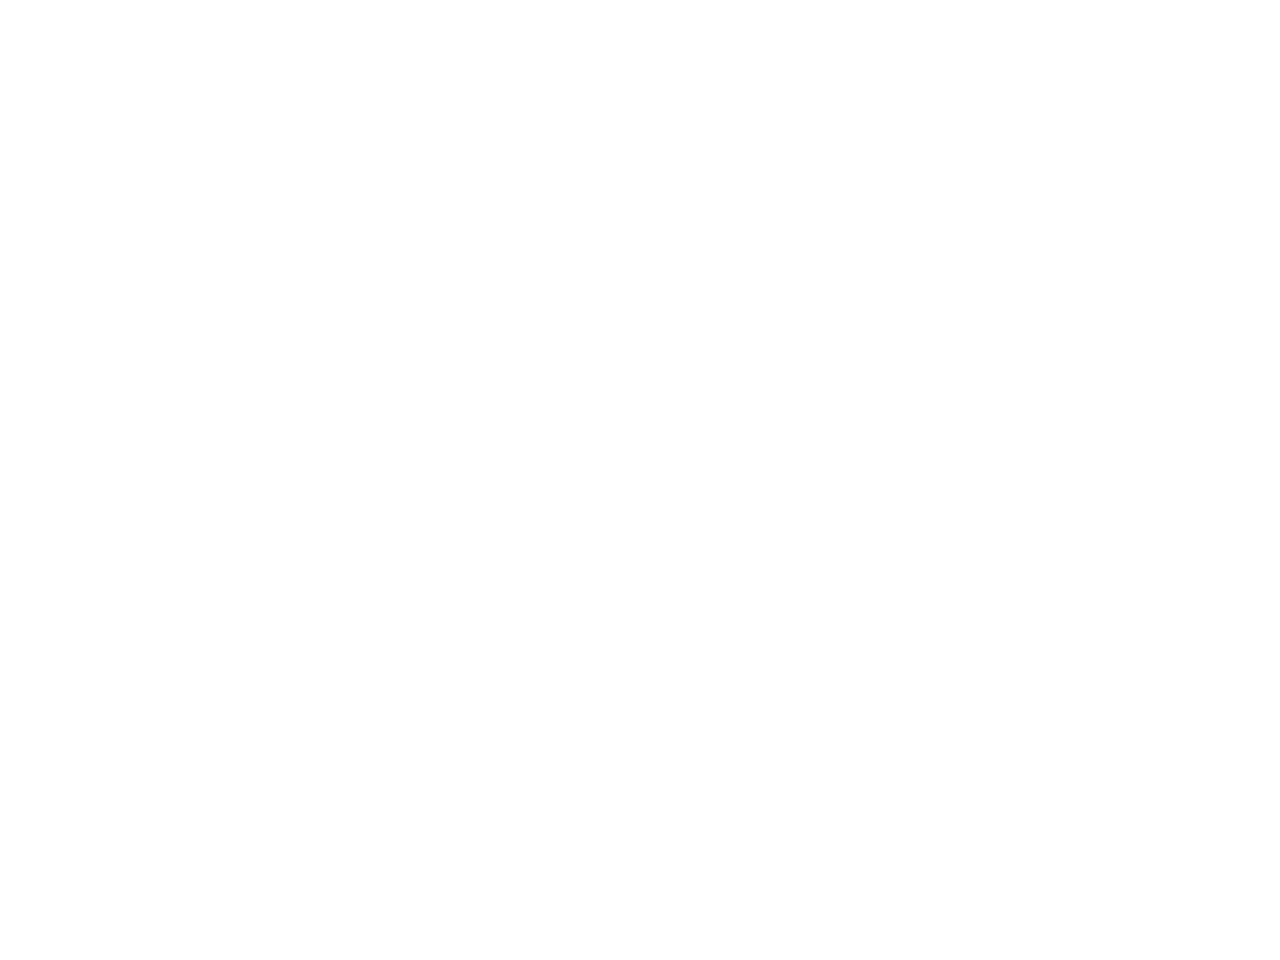

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3)

def plotting(f, i):
    x = np.linspace(-np.pi, np.pi, 1000)
    y = f(x)
    
    ax[i].plot(x, y, 'b-')
    
def f1(x):
    return np.sin(x)

def f2(x):
    return np.tan(49 * x/100)

def f3(x):
    return np.sin(x) * np.cos(2 * x)

plotting(f1, 0)
plotting(f2, 1)
plotting(f3, 2)

plt.show()

In [25]:
%run scripts/show_solutions.py week05_ex2

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---
## 2. Formatting plots

### 2.1. Setting plot axis properties

#### Axis limits

The axis range on your plots can be controlled using the `.set_xlim()` and `.set_ylim()` methods. For example, the following code plots the function $\sin \left( x \right)$ for $x \in \left[ 0, 2 \pi \right]$ on the `Axes` object assigned to the variable `my_ax`, and then specifies that the $x$-axis range should be from $0$ to $2 \pi$, and the $y$-axis range should be from $-1.1$ to $1.1$.

<IPython.core.display.Javascript object>


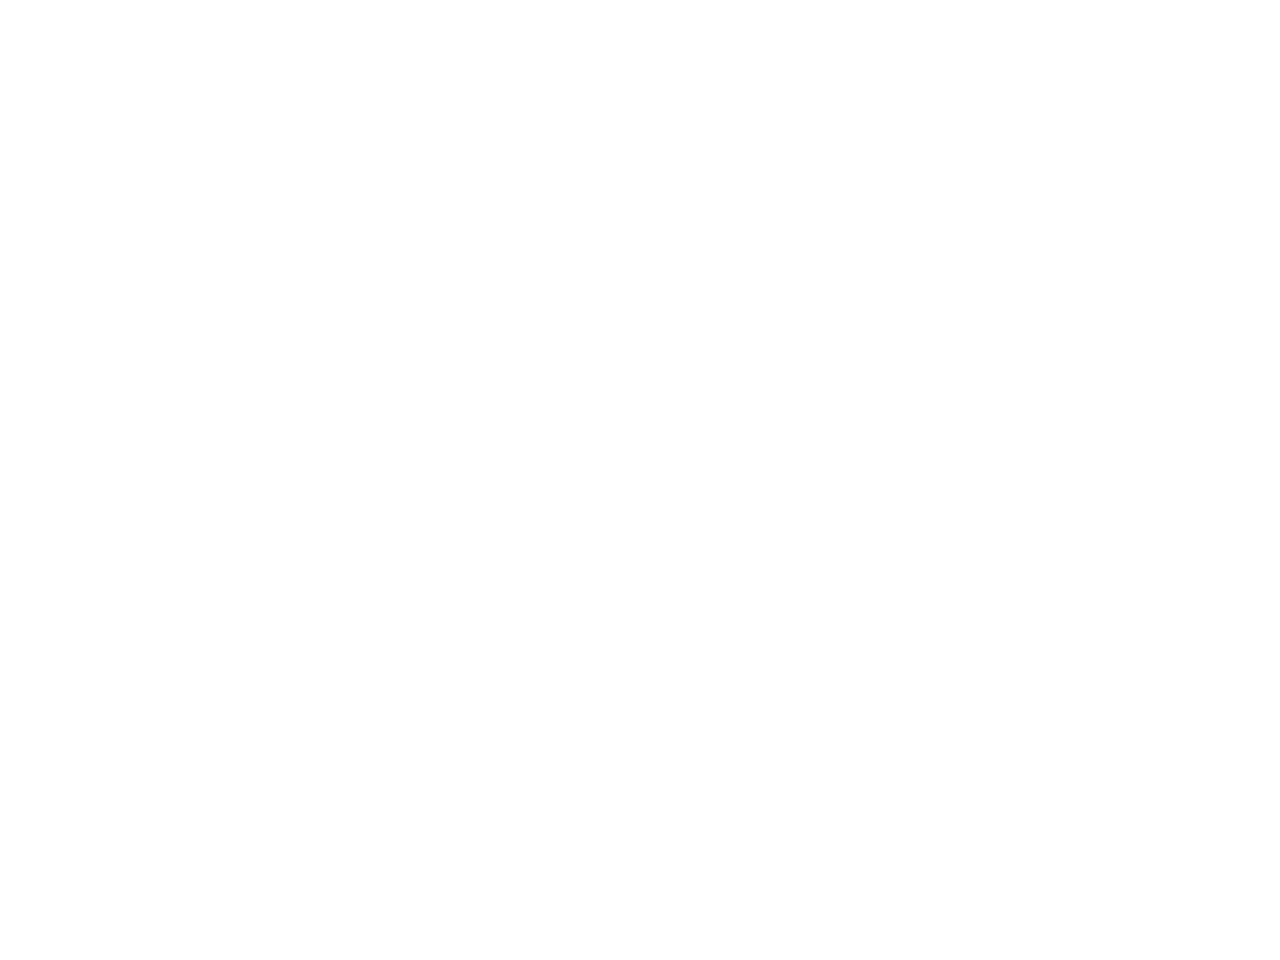

In [9]:
# Create 100 x-values from 0 to 2*pi
x = np.linspace(0, 2*np.pi, 100)

# Create the figure and axes
my_fig, my_ax = plt.subplots()

# Plot sin(x)
my_ax.plot(x, np.sin(x), 'k-')

# Adjust the x-axis and y-axis limits to tidy up the plot
my_ax.set_xlim([0, 2*np.pi + 1])
my_ax.set_ylim([-1.1, 1.1])

# Show the figure
plt.show()

#### Axis labels

Axis labels can be added using the `.set_xlabel()` and `.set_ylabel()` methods, for example

```python
ax.set_xlabel('x', fontsize=12)
```

The label is the first argument, a string. The additional argument, `fontsize=12`, is used to control the font size of the axis label, here setting the font size to $12$pt.  If you wish you can use LaTeX in axis labels via

```python
ax.set_xlabel(r'$x$', fontsize=12)
```

where the `r` before the label means "raw string"; this allows backslashes in e.g. LaTeX math symbols to be interpreted correctly.

> Plots should **always** include appropriate labelling!

---
🚩 ***Exercise 3:*** Start by running your code for Exercise 2, to create the 3 plots again. Use `set_xlim()` to control the $x$-axis range for each of the 3 plots, plotting values of $x \in \left[-\pi, \pi \right]$.

Use `set_xlabel()` and `set_ylabel()` to add axis labels to the plots, with a font size of $14$pt.

*Hints:*
* If the plot becomes a little squeezed, you can adjust the *spacing* between the subplots in a figure after you have created them, using the function `plt.subplots_adjust()`, for example
```python
plt.subplots_adjust(hspace=0.5, wspace=0.5)
```
where `hspace` (height spacing) and `wspace` (width spacing) should take values between 0 and 1. (See [Matplotlib: subplots_adjust](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html))
* Since the axes are indexed by number, you can use a `for` loop to set properties common to all axes.

<IPython.core.display.Javascript object>


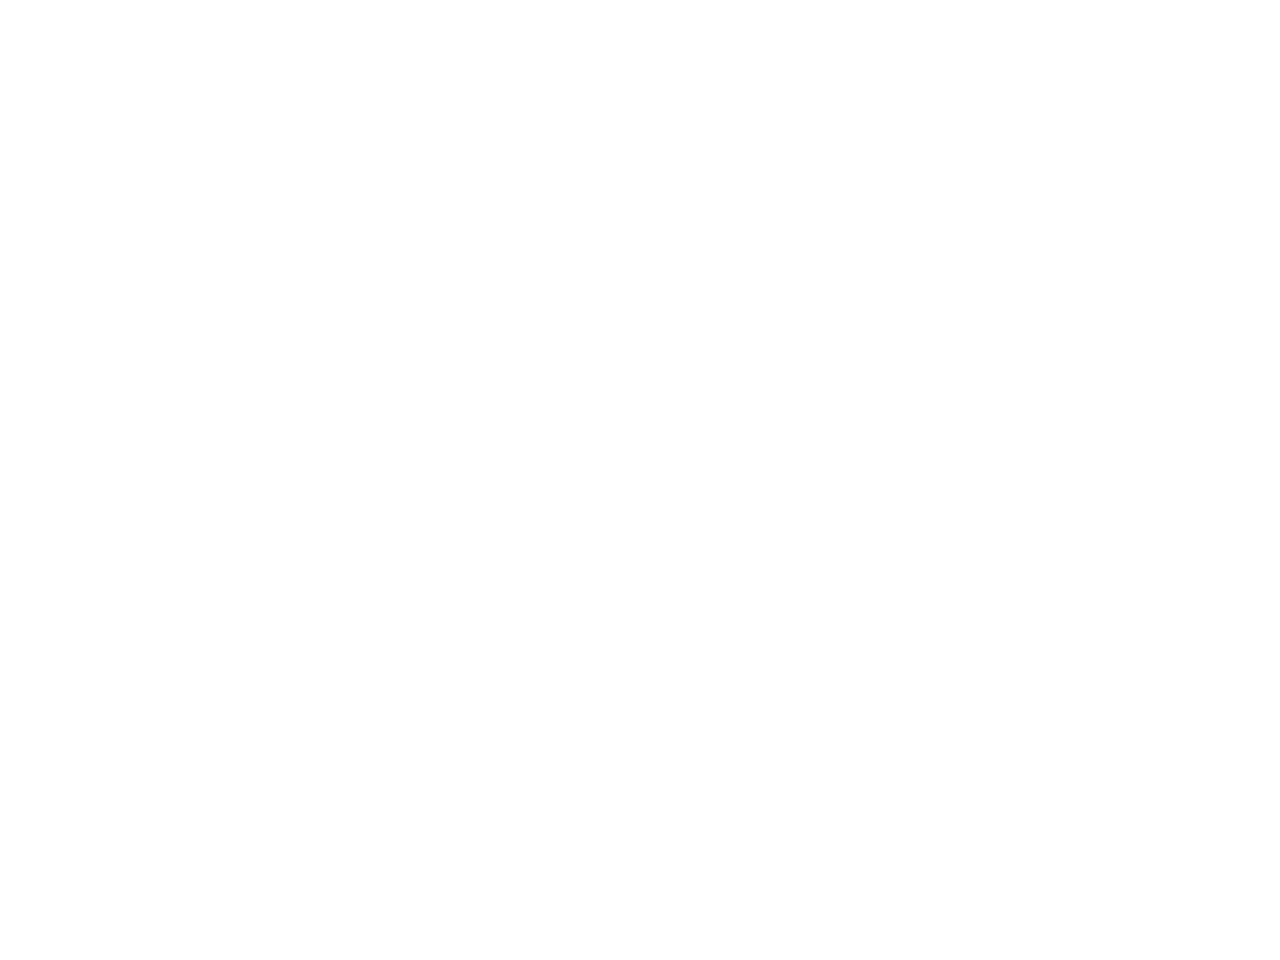

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3)

def plotting(f, i):
    x = np.linspace(-np.pi, np.pi, 1000)
    y = f(x)
    
    ax[i].plot(x, y, 'b-')
    ax[i].set_xlim(-4, 4)
    ax[i].set_ylim(-4, 4)
    ax[i].set_xlabel(r'$x$', fontsize=12)
    ax[i].set_ylabel(r'$y$', fontsize=12)
    
def f1(x):
    return np.sin(x)

def f2(x):
    return np.tan(49 * x/100)

def f3(x):
    return np.sin(x) * np.cos(2 * x)

plotting(f1, 0)
plotting(f2, 1)
plotting(f3, 2)

plt.subplots_adjust(hspace=1, wspace=1)
plt.show()

In [26]:
%run scripts/show_solutions.py week05_ex3

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---
### 2.2. Adding a legend

Earlier, we have seen how to display multiple lines on the same set of axes. When doing so, it is essential to add a legend to the plot, using **`ax.legend()`**, which labels all curves of the plot in `ax`. The label text should be set **when plotting the curve**, using the `label=` keyword argument of `.plot()`, and can contain LaTeX code.

For example, the following code displays a legend on `ax` with the green curve labelled $y_1$ and the yellow curve labelled $y_2$.

<IPython.core.display.Javascript object>


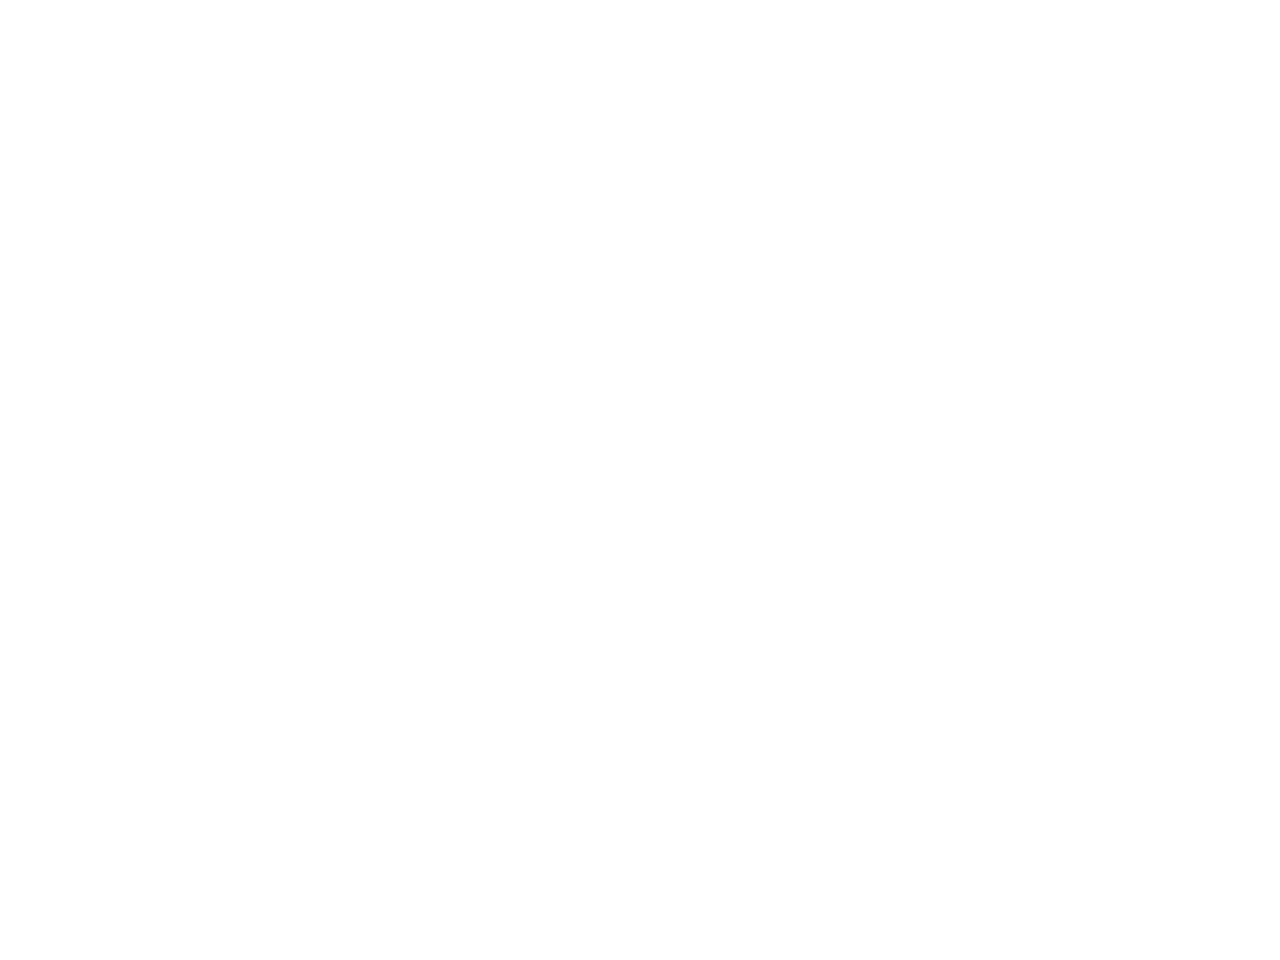

In [12]:
# Create an x-axis, and make 2 linear functions of x
x = np.linspace(-3, 3, 100)
y1 = 3*x - 2
y2 = -0.5*x + 1.5

# Plot both curves on the same axes
fig, ax = plt.subplots()
ax.plot(x, y1, 'g-', label=r'$y_1$')
ax.plot(x, y2, 'y-', label=r'$y_2$')

# .legend() will use the "label" arguments for each curve
ax.legend(loc='lower right', fontsize=14)

plt.show()

Note that the **location** can be controlled via an additional keyword argument `loc`, followed by a string indicating the location. Other locations can be chosen, for example you can try changing `'lower right'` to `'upper left'`.

The legend font size is also controlled the same way as for axis labels, e.g. here the font size is set to $14$.

---
**📚 Learn more:**
* [Matplotlib: legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html) - Documentation
* [Customizing Plot Legends](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html) - The Python Data Science Handbook

---
🚩 ***Exercise 4:*** The Maclaurin series for $\cos(x)$ is given by

$$
\cos(x) = \sum_{k=0}^{\infty} (-1)^k \frac{x^{2k}}{(2k)!}.
$$

Create a new figure with a single set of axes. Plot $\cos(x)$ over the interval $[-\pi, \pi]$. On the same axes, plot the Maclaurin series truncated to the second, fourth, and sixth order terms, evaluated over the same interval. Set the axis ranges and labels, and add a legend to the plot.

*Hint:* you may wish to use the function [`math.factorial()` included with the `math` module](https://docs.python.org/3/library/math.html).

<IPython.core.display.Javascript object>


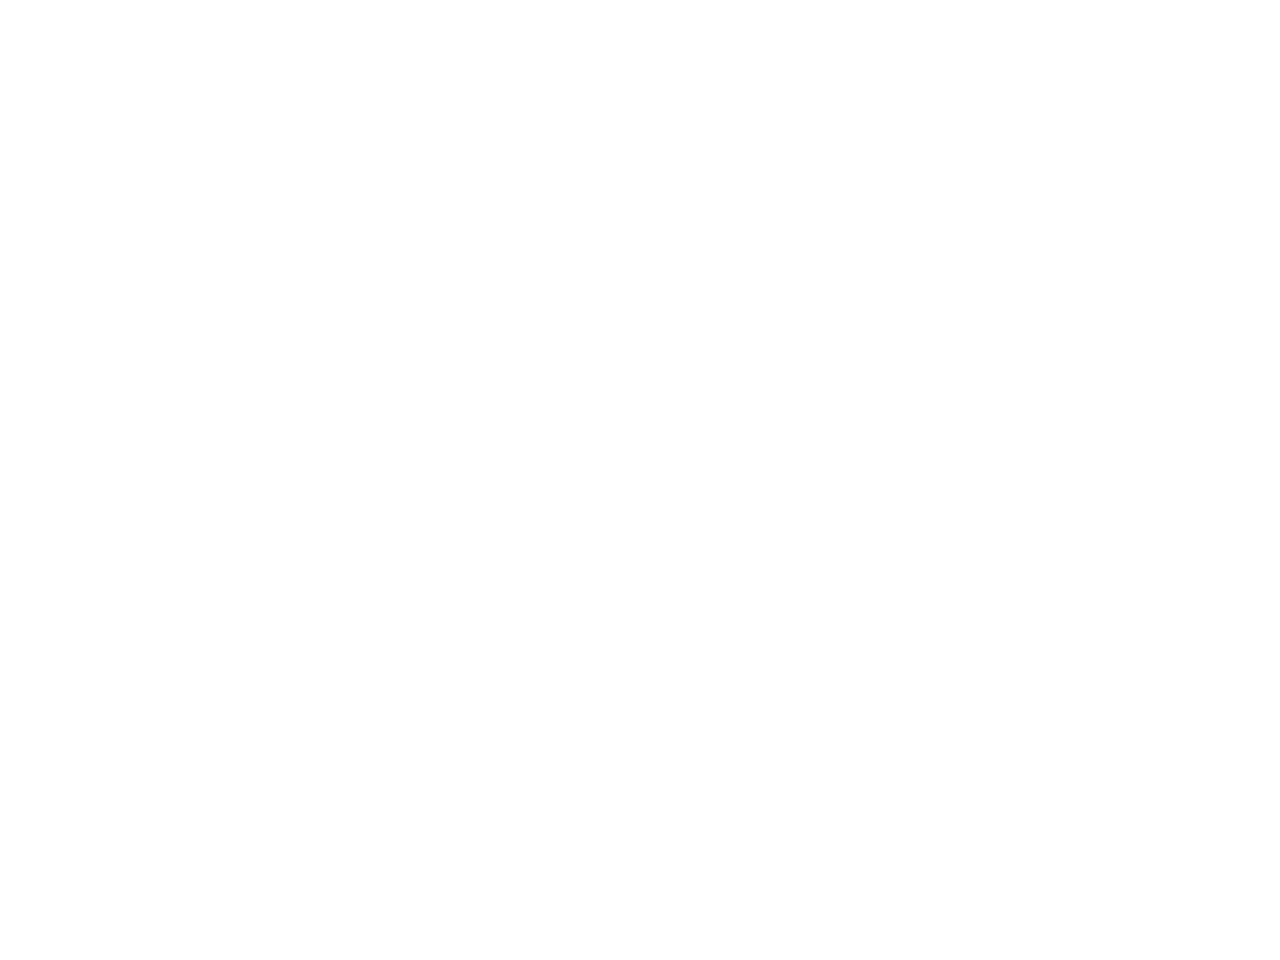

In [13]:
import math
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-math.pi, math.pi, 1000)
y = [np.cos(x)]

for i in [2, 4, 6]:
    y0 = np.zeros(1000)
    for j in range(i):
        y0 = y0 + ((-1) ** j) * (x ** (2 * j))/math.factorial(2 * j)
    
    y.append(y0)
    
c = ['b-', 'r-', 'g-', 'y-']
    
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y[i], c[i], label=f'y_{i}')
    
ax.legend(loc='lower right', fontsize=10)
    
plt.show()

In [27]:
%run scripts/show_solutions.py week05_ex4

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---
🚩 ***Exercise 5:*** Reproduce the following figure, as closely as possible. (Note: the triangles are called "markers" -- you can search for that in the documentation.)

![The figure to reproduce.](graphics/fig.png)

<IPython.core.display.Javascript object>


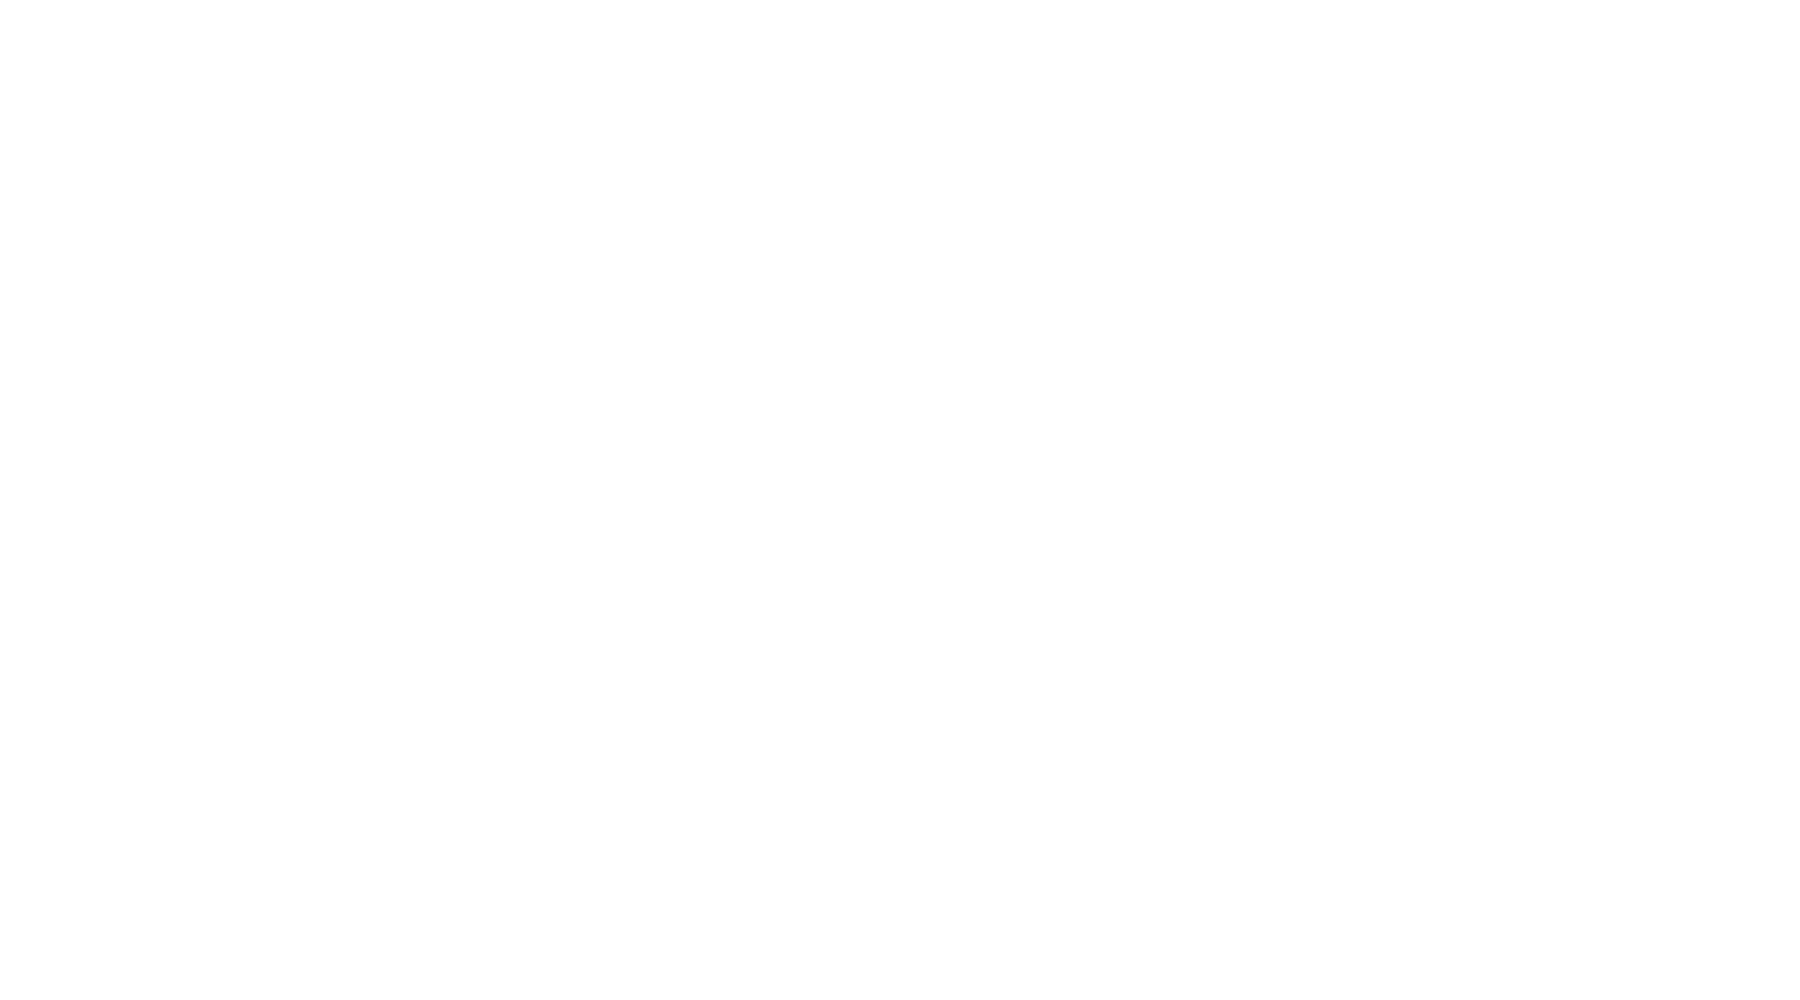

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Let's write a convenience function
def f(x):
    # Set coefficients
    a, b, c = -1, 3, 5
    
    # Compute the roots
    sqrt_delta = np.sqrt(b**2 - 4*a*c)
    roots = [(-b - sqrt_delta)/(2 * a), (-b + sqrt_delta)/(2 * a)]
    
    # Return the polynomial and the 2 roots
    return a*x**2 + b*x + c, roots

# Create an x-axis, compute f(x) and both roots
x = np.linspace(-4, 5, 100)
y, roots = f(x)

# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

# Plot the function and the roots
ax.plot(x, y, '--', color='deepskyblue', label=r'$f(x) = -x^2 + 3x + 5$')
ax.plot(x, np.zeros(x.shape[0]), 'k-', label=r'$y = 0$')
ax.plot(roots[0], 0, 'magenta', label='First root', marker='^', markersize=10)
ax.plot(roots[1], 0, 'magenta', label='Second root', marker='^', markersize=10)

# Tidy up the plot
ax.set_xlim([-4, 5])
ax.set_ylim([y[0], 10])
ax.set_xticks(range(-4, 6))
ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$f(x)$', fontsize=14)
ax.set_title('Polynomial roots', fontsize=14)
ax.legend(loc='lower center')
ax.grid(True)

plt.show()

In [28]:
%run scripts/show_solutions.py week05_ex5

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

## 3. Numerical integration

🚩 *Recommended reading:* Section 3.3 in **ASC**

Numerical integration is the process of computing an approximation of a definite integral, using a particular *scheme*. There are many different ways we could go about this, but in general, we want to approximate an integral using a **weighted sum** which is easy to compute:

$$
\int_a^b f(x) \ dx \approx \sum_{k=0}^{N-1} w_k f(x_k),
$$

where
- $x_k \in [a, b]$ are **nodes**, i.e. a finite number of points chosen in the integration interval,
- $w_k \in \mathbb{R}$ are **weights** (coefficients) chosen appropriately.

The choice of nodes and weights differentiates one numerical integration method from another, and different choices lead to different *degrees of precision*. We will see more about this next week.

### 3.1. Riemann sums

You probably already know a numerical integration method -- the Riemann sum. Run the code cell below to display a figure (it uses [`matplotlib.patches.Rectangle()`](https://matplotlib.org/api/_as_gen/matplotlib.patches.Rectangle.html)):

<IPython.core.display.Javascript object>


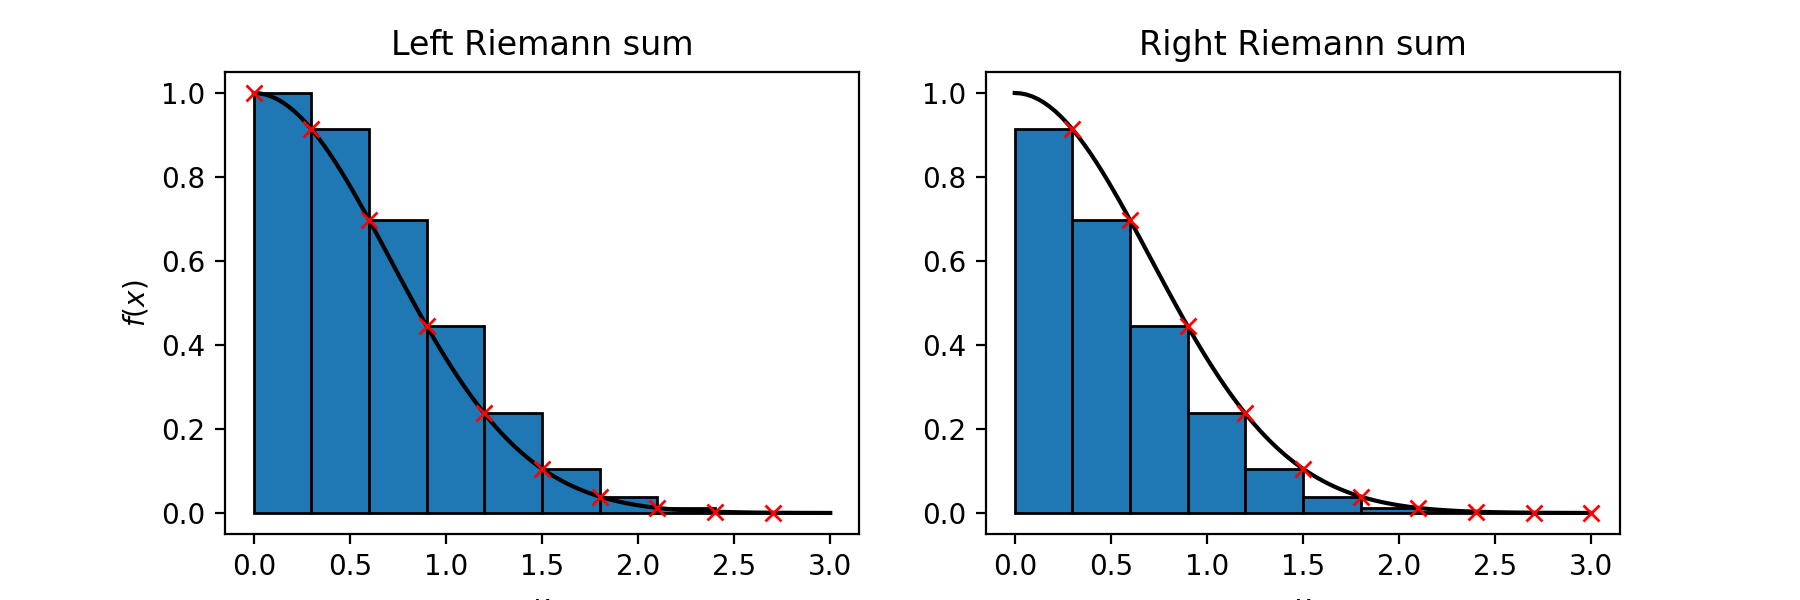

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def f(x):
    return np.exp(-x**2)

# Create an x-axis with 100 points and estimate the function
a, b = 0, 3
x_plot = np.linspace(a, b, 100)
f_plot = f(x_plot)

# Create the nodes
N = 10
x_node = np.linspace(a, b, N+1)
f_node = f(x_node)

# Plot the function
fig, ax = plt.subplots(1, 2, figsize=(9, 3))

ax[0].plot(x_plot, f_plot, 'k-')
ax[1].plot(x_plot, f_plot, 'k-')

# Plot the rectangles for left and right sums
h = (b - a) / N
for k in range(N):
    rect = patches.Rectangle((x_node[k], 0), h, f_node[k], edgecolor='k')
    ax[0].add_patch(rect)
    
    rect = patches.Rectangle((x_node[k], 0), h, f_node[k+1], edgecolor='k')
    ax[1].add_patch(rect)
    
    
# Plot the nodes
ax[0].plot(x_node[:-1], f_node[:-1], 'rx')
ax[1].plot(x_node[1:], f_node[1:], 'rx')

# Label the plots
ax[0].set_xlabel(r'$x$')
ax[1].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$f(x)$')

ax[0].set_title('Left Riemann sum')
ax[1].set_title('Right Riemann sum')

plt.show()

We can estimate the integral of $f(x)$ by calculating the area shaded in blue. Here, we subdivide the interval $[a, b]$ into $N$ partitions of equal width $h$:

$$
h = \frac{b-a}{N}
$$

The **nodes** are the end points of these sub-intervals, and here the **weights** are simply $h$, the width of each interval. The integral of $f(x)$ between $a$ and $b$ can then be estimated as:

$$
\begin{align}
\int_a^b f(x) \ dx &\approx \sum_{k=0}^{N-1} h \ f(x_k), \quad & \text{left Riemann sum} \\
\int_a^b f(x) \ dx &\approx \sum_{k=1}^N h \ f(x_k), \quad & \text{right Riemann sum}
\end{align}
$$

where the $N+1$ nodes $x_k$ are given by $x_k = a + kh$, with $k = 0, 1, \dots, N$. With this choice of nodes and weights, each element of the sum is simply the area of one blue rectangle.

In [18]:
from math import erf

# Estimate the integral
left_I = np.sum(h * f_node[:-1])
right_I = np.sum(h * f_node[1:])

# Exact value
I_exact = np.sqrt(np.pi) / 2 * (erf(b) - erf(a))

print(f'The exact integral is {I_exact:.3f}.\n')
print(f'The left Riemann sum is {left_I:.3f}.\n')
print(f'The right Riemann sum is {right_I:.3f}.\n')

The exact integral is 0.886.

The left Riemann sum is 1.036.

The right Riemann sum is 0.736.



---
🚩 ***Exercise 6:*** Using the Riemann sum methods above, estimate the value of the integral using different values of $N$. How does the accuracy change with $N$?

*Hint:* plot $\log(N)$ vs. $\log(\text{error})$. You may wish to use e.g. [`np.polyfit()`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) or [`scipy.stats.linregress()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html).

<IPython.core.display.Javascript object>


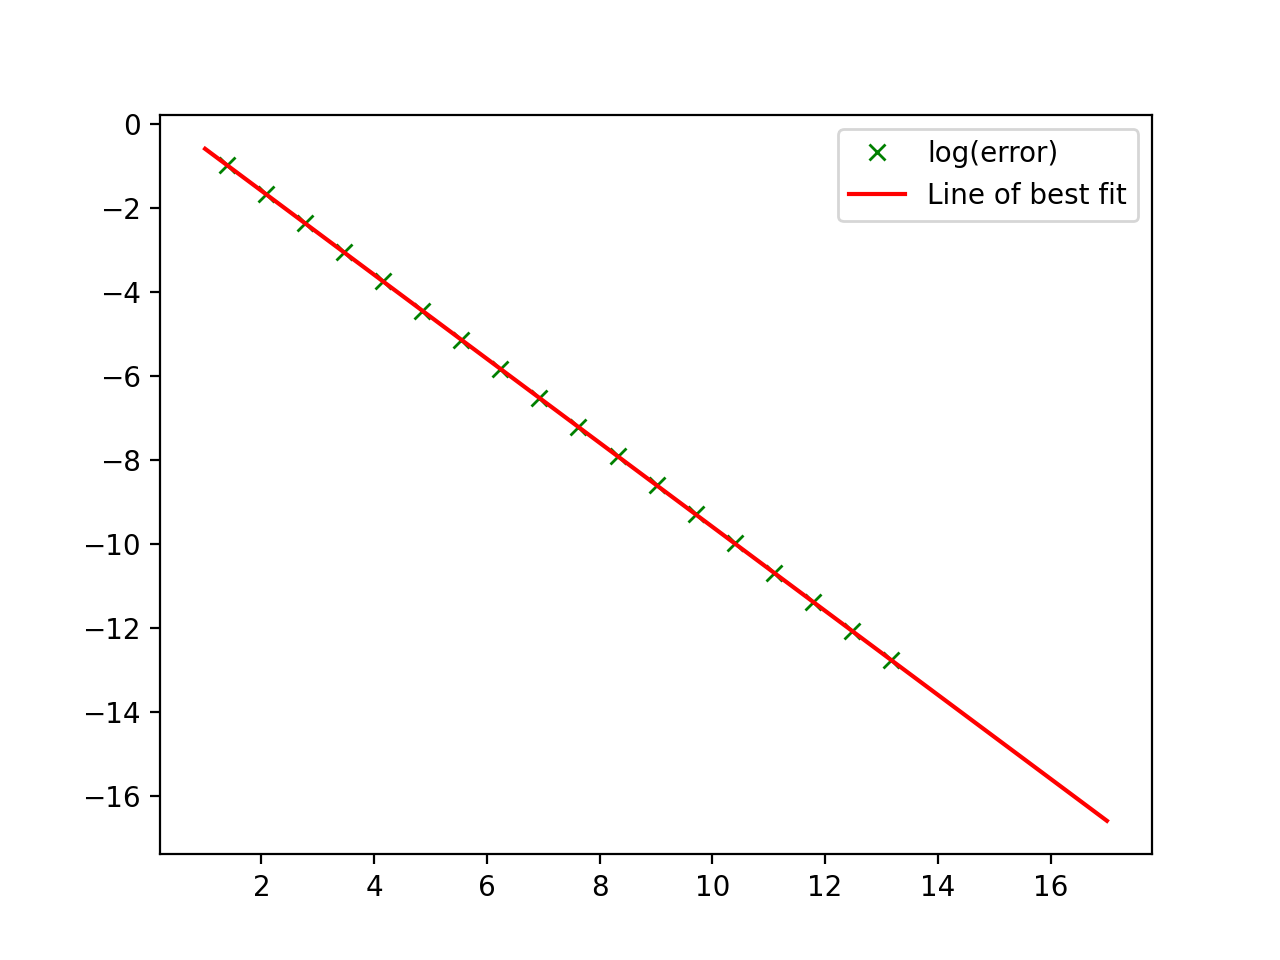

The slope is -0.999996.


In [19]:
def riemann_sum(f, a, b, N, direction):
    '''
    Returns an estimation of the integral of f over [a, b]
    using left or right Riemann sum with N intervals.
    '''
    # Calculate the nodes and weights
    x_node = np.linspace(a, b, N+1)
    h = (b - a) / N
    
    # Compute the sum depending on the method
    if direction == 'left':
        x_node = x_node[:-1]
    elif direction == 'right':
        x_node = x_node[1:]
    else:
        print('Choose \'left\' or \'right\' for direction.')
        return
    
    return np.sum(h * f(x_node))


# Test accuracy with different values of N: 4, 8, 16, 32...
err = []
N_vals = []
t = 20
for i in range(2, t):
    N = 2**i
    N_vals.append(N)
    err.append(abs(I_exact - riemann_sum(f, 0, 3, N, 'left')))

# Plot log(N) vs. log(err)
fig, ax = plt.subplots()
ax.plot(np.log(N_vals), np.log(err), 'gx', label='log(error)')

# Fit a line (a deg. 1 polynomial) through the points
line_coeffs = np.polyfit(np.log(N_vals), np.log(err), 1)

# Plot the line on the same graph
x_plot = np.linspace(1, t - 3, 100)
line_plot = np.polyval(line_coeffs, x_plot)
ax.plot(x_plot, line_plot, 'r-', label='Line of best fit')

ax.legend()

print(f'The slope is {line_coeffs[0]:.6f}.')
plt.show()

In [29]:
%run scripts/show_solutions.py week05_ex6

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---
### 3.2. The midpoint rule

The midpoint rule is similar to the Riemann sums, but the nodes are taken as the **midpoint** of each partition instead of one of the extremities:

$$
\int_a^b f(x) \ dx \approx \sum_{k=0}^{N-1} h \ f(x_k),
$$

where the nodes $x_k$ are given by $x_k = a + \left(k + \frac{1}{2}\right)h$, with $k = 0, 1, \dots, N-1$.

<IPython.core.display.Javascript object>


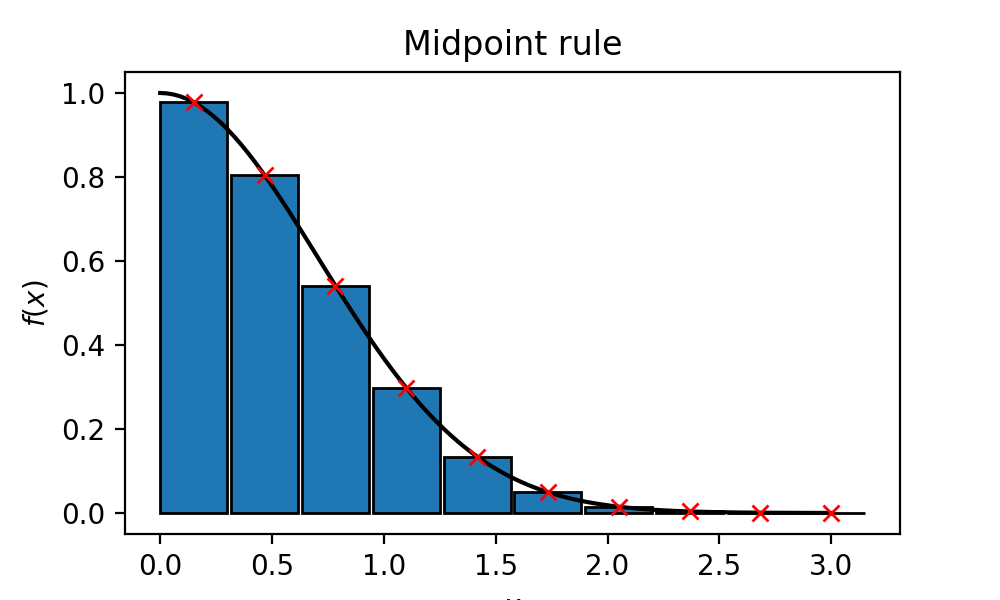

The exact integral is 0.886.

The estimated integral using the midpoint rule is 0.848.



In [32]:
def f(x):
    return np.exp(-x**2)

# Create an x-axis with 100 points and estimate the function
a, b = 0, 3
x_plot = np.linspace(a, b, 100)
f_plot = f(x_plot)

# Create the nodes
N = 10
h = (b - a) / N
x_node = np.linspace(a + 0.5*h, b, N)
f_node = f(x_node)

# Plot the function
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x_plot, f_plot, 'k-')

# Plot the rectangles
for k in range(N):
    rect = patches.Rectangle((x_node[k] - 0.5*h, 0), h, f_node[k], edgecolor='k')
    ax.add_patch(rect)

# Plot the nodes
ax.plot(x_node, f_node, 'rx')

# Label the plots
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_title('Midpoint rule')

plt.show()

# Estimate the integral
midpoint_I = np.sum(h * f_node)

# Exact value
I_exact = np.sqrt(np.pi) / 2 * (erf(b) - erf(a))

print(f'The exact integral is {I_exact:.3f}.\n')
print(f'The estimated integral using the midpoint rule is {midpoint_I:.3f}.\n')

---
🚩 ***Exercise 7:*** Using the midpoint rule method above, estimate the value of the integral using different values of $N$. How does the accuracy change with $N$?

<IPython.core.display.Javascript object>


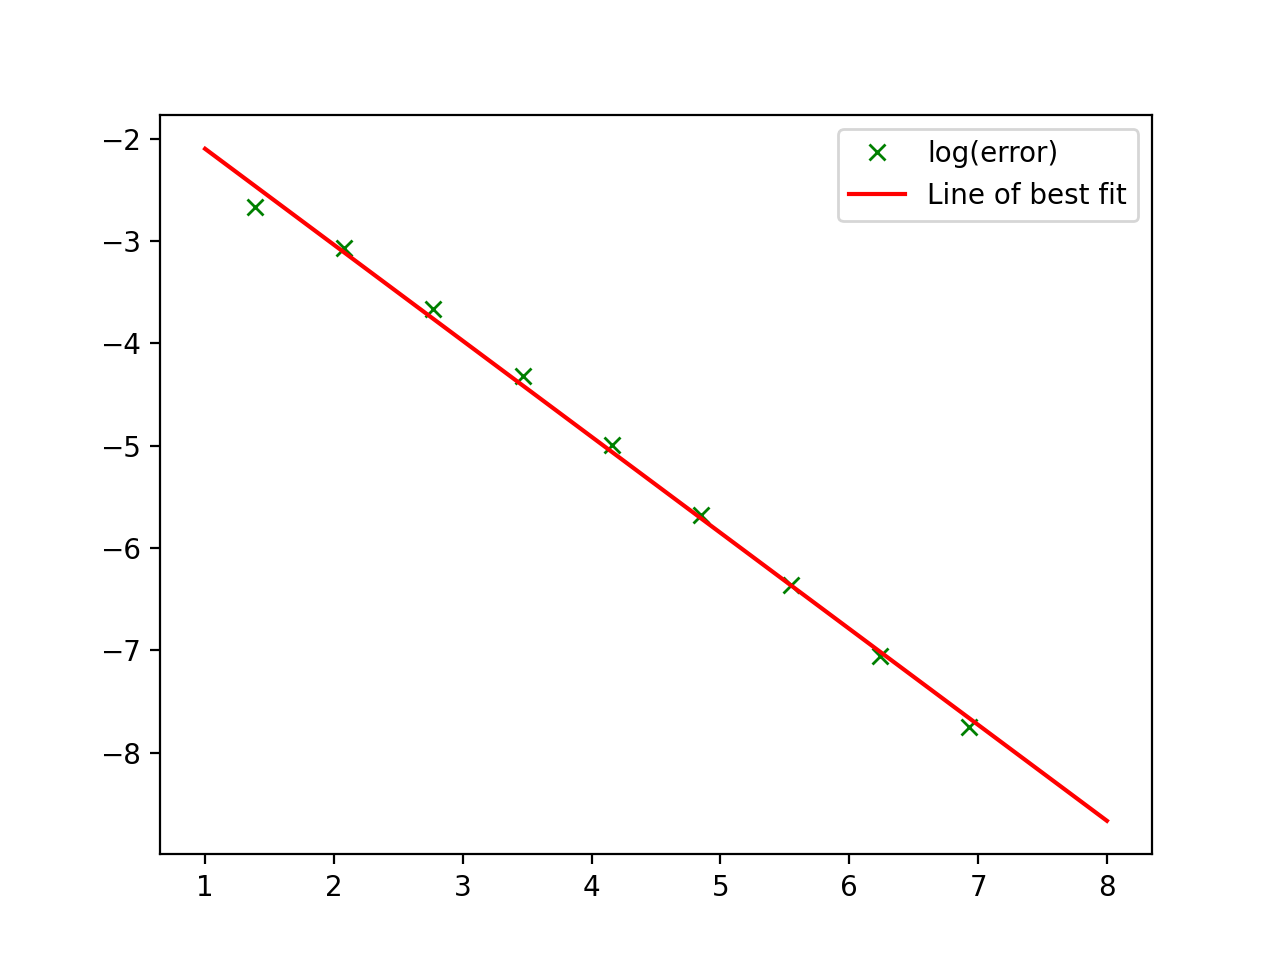

The slope is -0.937822.


In [33]:
def midpoint(f, a, b, N):
    '''
    Returns an estimation of the integral of f over [a, b]
    using the midpoint rule with N intervals.
    '''
    # Calculate the nodes
    h = (b - a) / N
    x_node = np.linspace(a + 0.5*h, b, N)
    
    # Compute the sum and return it
    return np.sum(h * f(x_node))


# Test accuracy with different values of N: 4, 8, 16, 32...
err = []
N_vals = []
for i in range(2, 11):
    N = 2**i
    N_vals.append(N)
    err.append(abs(I_exact - midpoint(f, 0, 3, N)))

# Plot log(N) vs. log(err)
fig, ax = plt.subplots()
ax.plot(np.log(N_vals), np.log(err), 'gx', label='log(error)')

# Fit a line (a deg. 1 polynomial) through the points
line_coeffs = np.polyfit(np.log(N_vals), np.log(err), 1)

# Plot the line on the same graph
x_plot = np.linspace(1, 8, 100)
line_plot = np.polyval(line_coeffs, x_plot)
ax.plot(x_plot, line_plot, 'r-', label='Line of best fit')

ax.legend()

print(f'The slope is {line_coeffs[0]:.6f}.')
plt.show()

In [30]:
%run scripts/show_solutions.py week05_ex7

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

---
### 3.3. The trapezoid rule

The trapezoid rule also uses partitions of equal width, but instead of approximating the integral as the area of rectangles, it uses trapezoids -- the function is interpolated linearly between the nodes.

$$
\int_a^b f(x) \ dx \approx \sum_{k=0}^{N-1} h\frac{\left(f(x_k) + f(x_{k+1})\right)}{2} ,
$$

where the nodes $x_k$ are given by $x_k = a +kh$, with $k = 0, 1, \dots, N$.

<IPython.core.display.Javascript object>


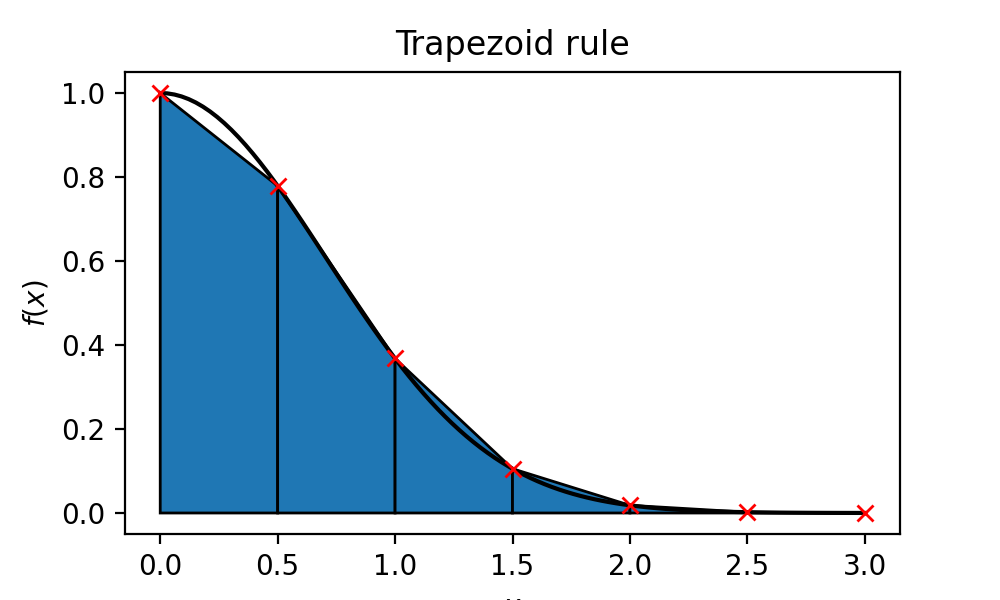

The exact integral is 0.886.

The estimated integral using the midpoint rule is 0.886.



In [34]:
def f(x):
    return np.exp(-x**2)

# Create an x-axis with 100 points and estimate the function
a, b = 0, 3
x_plot = np.linspace(a, b, 100)
f_plot = f(x_plot)

# Create the nodes
N = 6
h = (b - a) / N
x_node = np.linspace(a, b, N + 1)
f_node = f(x_node)

# Plot the function
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x_plot, f_plot, 'k-')

# Plot the trapezoids
for k in range(N):
    verts = [[x_node[k], 0], [x_node[k+1], 0],
             [x_node[k+1], f_node[k+1]], [x_node[k], f_node[k]]]
    trapz = patches.Polygon(verts, h, edgecolor='k')
    ax.add_patch(trapz)

# Plot the nodes
ax.plot(x_node, f_node, 'rx')

# Label the plots
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_title('Trapezoid rule')

plt.show()

# Estimate the integral
midpoint_I = np.sum(0.5 * h * (f_node[:-1] + f_node[1:]))

# Exact value
I_exact = np.sqrt(np.pi) / 2 * (erf(b) - erf(a))

print(f'The exact integral is {I_exact:.3f}.\n')
print(f'The estimated integral using the midpoint rule is {midpoint_I:.3f}.\n')

---
🚩 ***Exercise 8:*** Using the trapezoid rule method above, estimate the value of the integral using different values of $N$. How does the accuracy change with $N$?

<IPython.core.display.Javascript object>


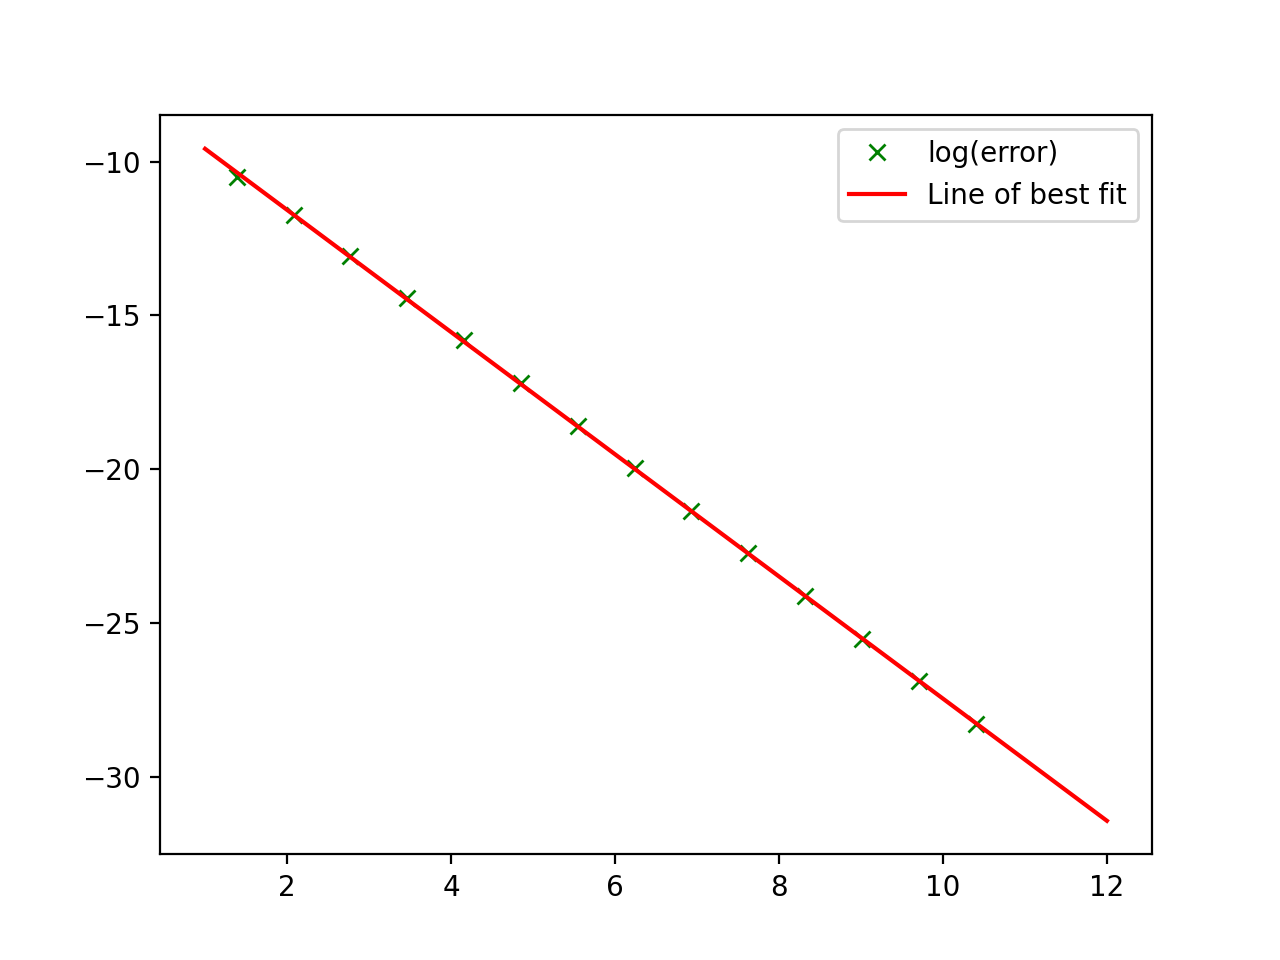

The slope is -1.987042.


In [35]:
def trapezoid(f, a, b, N):
    '''
    Returns an estimation of the integral of f over [a, b]
    using the trapezoid rule with N intervals.
    '''
    # Calculate the nodes
    x_node = np.linspace(a, b, N+1)
    h = (b - a) / N
    
    # Compute the sum and return it
    return np.sum(0.5 * h * (f(x_node[:-1]) + f(x_node[1:])))


# Test accuracy with different values of N: 4, 8, 16, 32...
err = []
N_vals = []
for i in range(2, 16):
    N = 2**i
    N_vals.append(N)
    err.append(abs(I_exact - trapezoid(f, 0, 3, N)))

# Plot log(N) vs. log(err)
fig, ax = plt.subplots()
ax.plot(np.log(N_vals), np.log(err), 'gx', label='log(error)')

# Fit a line (a deg. 1 polynomial) through the points
line_coeffs = np.polyfit(np.log(N_vals), np.log(err), 1)

# Plot the line on the same graph
x_plot = np.linspace(1, 12, 100)
line_plot = np.polyval(line_coeffs, x_plot)
ax.plot(x_plot, line_plot, 'r-', label='Line of best fit')

ax.legend()

print(f'The slope is {line_coeffs[0]:.6f}.')
plt.show()

In [31]:
%run scripts/show_solutions.py week05_ex8

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))